In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-bright')
plt.rcParams['figure.figsize'] = [15, 5]
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.25

In [2]:
def midpoint(f, a, b, n):
    h = (b - a) / (n + 1)
    nodes = np.arange(a + h/2, b, step=h)
    return h*np.sum(f(nodes))

def trapezoidal(f, a, b, n):
  nodes, h = np.linspace(a,b,n+1,retstep=True)
  y  = f(nodes)
  return h*(np.sum(y) - (y[0]+y[-1])/2)

def simpson(f, a, b, n):
  n = int(n/2)*2
  nodes, h = np.linspace(a, b, n+1, retstep=True)
  y = f(nodes)
  return h/3*( y[0] + 2*np.sum(y[2:n:2]) + 4*np.sum(y[1:n:2]) + y[-1] )

## Problem 2

In [3]:
def composite_prob1(f, a, b, n):
    n = int(n/2)*2
    nodes, h = np.linspace(a, b, num=int(3*n / 2) + 1, retstep=True)
    nodes = list(nodes)
    del nodes[2::3]
    nodes = np.array(nodes)
    y = f(nodes)
    return (h/4)*((9)*np.sum(y[1::2]) + (3)*np.sum(y[2::2]))

In [4]:
f = lambda x : np.exp(3*x)
F = lambda x : 1/3*np.exp(3*x)
a = -1
b = 2
I = F(b) - F(a)

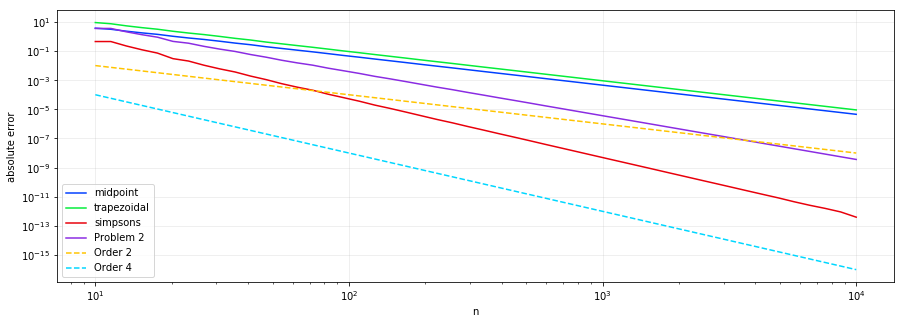

In [5]:
ns = np.logspace(1, 4)
midpoint_error = []
trapezoidal_error = []
simpson_error = []
prob1_error = []

for n in ns:
    n = int(n)
    midpoint_error.append(np.abs(I - midpoint(f, a, b, n)))
    trapezoidal_error.append(np.abs(I - trapezoidal(f, a, b, n)))
    simpson_error.append(np.abs(I - simpson(f, a, b, n)))
    prob1_error.append(np.abs(I - composite_prob1(f, a, b, n)))

plt.plot(ns, midpoint_error)
plt.plot(ns, trapezoidal_error)
plt.plot(ns, simpson_error)
plt.plot(ns, prob1_error)
plt.plot(ns, 1/ns**2, '--')
plt.plot(ns, 1/ns**4, '--')
plt.legend(['midpoint', 'trapezoidal', 'simpsons', 'Problem 2', 'Order 2', 'Order 4'])
plt.xscale('log')
plt.yscale('log')
plt.xlabel('n')
plt.ylabel('absolute error')
plt.show()

Based on the plot, the new method seems to be about second order. It performs better than midpoint and trapezoidal, but not as well as Simpson's.

## Problem 3

In [6]:
def create_table(f, a, b, nRows):
  n = 1
  table = []
  for i in range(nRows):
    I = midpoint(f, a, b, n)
    newRow = [I]
    if i > 0:
      oldRow = table[-1]
    for j in range(i):
      qj = 4**(j+1)
      newRow.append(  (qj*newRow[-1] - oldRow[j])/( qj-1) )
    table.append(newRow)
    n *= 2
  return table

In [7]:
f = lambda x : np.cos(x)
F = lambda x : np.sin(x)
a = 0
b = 50
I = F(b) - F(a)

table = create_table(f, a, b, 12)
for row in table:
  for entry in row:
    print("{:.2e}  ".format(abs(entry-I)),end="") # suppress new line
  print("") # new line

4.97e+01  
2.20e+00  1.95e+01  
1.63e+00  2.91e+00  4.40e+00  
1.79e+00  2.92e+00  3.31e+00  3.44e+00  
1.25e-01  4.28e-01  6.52e-01  7.14e-01  7.31e-01  
2.69e-02  5.96e-03  2.22e-02  3.29e-02  3.58e-02  3.66e-02  
6.58e-03  1.86e-04  1.99e-04  1.50e-04  2.79e-04  3.14e-04  3.23e-04  
1.65e-03  5.39e-06  1.81e-05  1.52e-05  1.59e-05  1.62e-05  1.63e-05  1.63e-05  
4.14e-04  2.47e-06  2.28e-06  2.02e-06  1.97e-06  1.96e-06  1.95e-06  1.95e-06  1.95e-06  
1.04e-04  4.24e-07  2.88e-07  2.56e-07  2.49e-07  2.48e-07  2.47e-07  2.47e-07  2.47e-07  2.47e-07  
2.60e-05  6.04e-08  3.61e-08  3.21e-08  3.13e-08  3.11e-08  3.10e-08  3.10e-08  3.10e-08  3.10e-08  3.10e-08  
6.51e-06  8.01e-09  4.52e-09  4.02e-09  3.91e-09  3.88e-09  3.88e-09  3.88e-09  3.88e-09  3.88e-09  3.88e-09  3.88e-09  


Based on the table values, there seems to be an adavantage to using composite trapezoidal rule.

## Problem 4

In [8]:
f = lambda x : np.exp(-x*1j)/(1 + np.cos(x)/2)
a = -np.pi
b = np.pi
I = 2 - (4 / np.sqrt(3))
I *= (np.pi * 2)

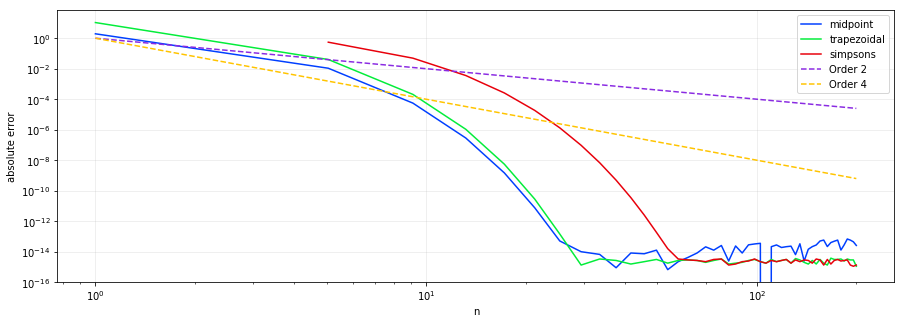

In [11]:
ns = np.linspace(1, 200)
midpoint_error = []
trapezoidal_error = []
simpson_error = []

for n in ns:
    n = int(n)
    midpoint_error.append(np.abs(I - np.real(midpoint(f, a, b, n))))
    trapezoidal_error.append(np.abs(I - np.real(trapezoidal(f, a, b, n))))
    simpson_error.append(np.abs(I - np.real(simpson(f, a, b, n))))

plt.plot(ns, midpoint_error)
plt.plot(ns, trapezoidal_error)
plt.plot(ns, simpson_error)
plt.plot(ns, 1/ns**2, '--')
plt.plot(ns, 1/ns**4, '--')
plt.legend(['midpoint', 'trapezoidal', 'simpsons', 'Order 2', 'Order 4'])
plt.xscale('log')
plt.yscale('log')
plt.xlabel('n')
plt.ylabel('absolute error')
plt.show()

There doesn't seem to be an advantage to using a higher-order method like Simpson's rule. Based on the plot, the midpoint and trapezoidal methods converge much faster. Theoretically, this is most likely because Simpson's method works better for polynomials, but when working with oscilatory functions like those used for DFT, the lower order methods work better.